## Feature Engineering

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import joblib

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

import missingno as msno

import warnings

In [6]:
warnings.filterwarnings('ignore')

In [8]:
df_train = pd.read_csv('../Data/df_train.csv', sep=',')
df_valid = pd.read_csv('../Data/df_valid.csv', sep=',')
df_test = pd.read_csv('../Data/df_test.csv', sep=',')

In [13]:
columns_with_missings = joblib.load('../artifacts/columns_with_missings.pkl')
df_numerical_variables = joblib.load('../artifacts/df_numerical_variables.pkl')
df_categorical_variables = joblib.load('../artifacts/df_categorical_variables.pkl')

## Dealing with Missing Values

In [14]:
columns_with_missings.tolist()

['Latitude', 'Longitude']

In [20]:
for col in columns_with_missings:
    print(f'Frequency counts for {col}:')
    print(df_train[col].value_counts(normalize=True))
    print('--------------------------')

Frequency counts for Latitude:
Latitude
25.189427    0.059919
25.055945    0.059556
25.078641    0.051739
25.186684    0.050046
24.493598    0.041665
               ...   
25.328623    0.000040
25.364588    0.000040
25.029302    0.000040
25.440420    0.000040
25.280687    0.000040
Name: proportion, Length: 268, dtype: float64
--------------------------
Frequency counts for Longitude:
Longitude
55.264819    0.059919
55.207465    0.059556
55.135252    0.051739
55.274705    0.050046
54.407841    0.041665
               ...   
55.441601    0.000040
55.396482    0.000040
55.279976    0.000040
55.635962    0.000040
55.878096    0.000040
Name: proportion, Length: 268, dtype: float64
--------------------------


<Axes: >

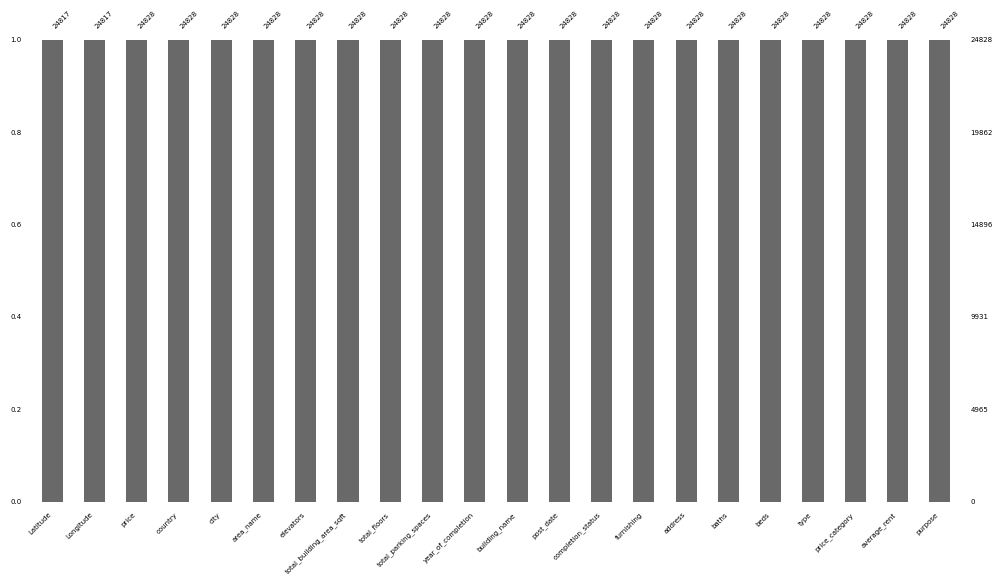

In [27]:
msno.bar(
    df_train,
    figsize = (12, 6),
    # color = 'blue',
    sort = 'ascending',
    fontsize = 5
)

<Axes: >

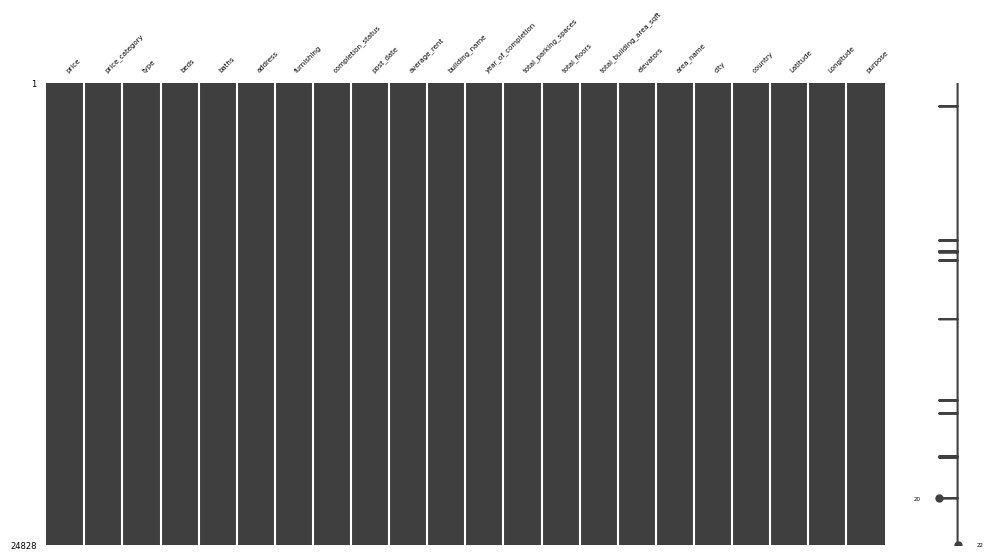

In [26]:
msno.matrix(
    df_train,
    figsize = (12, 6),
    fontsize = 5
)

<Axes: >

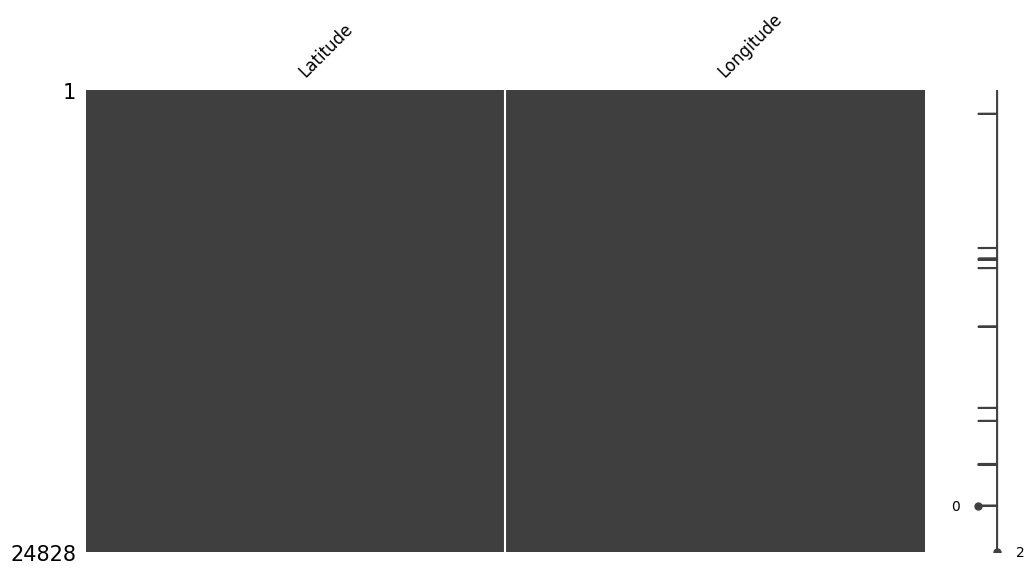

In [25]:
msno.matrix(
    df_train[columns_with_missings],
    figsize = (12, 6),
    fontsize = 12
)

<Axes: >

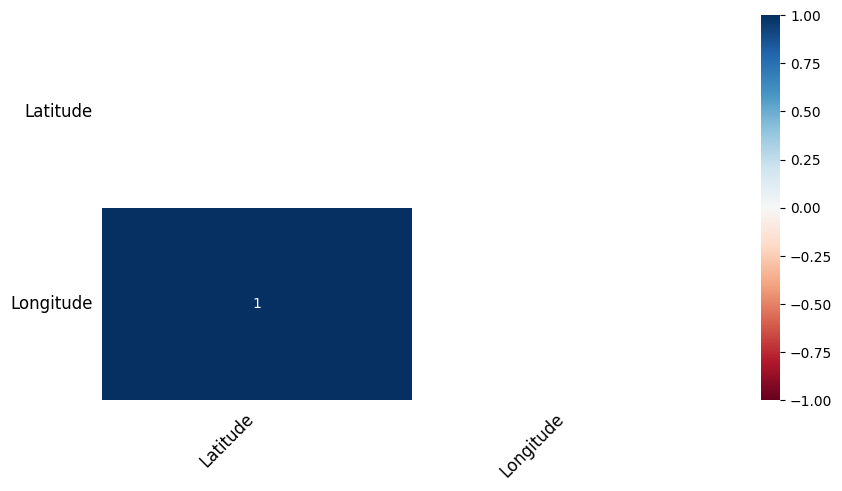

In [32]:
msno.heatmap(
    df_train,
    figsize = (10, 5),
    fontsize = 12
)

In [33]:
df_train[columns_with_missings].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24828 entries, 0 to 24827
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   24817 non-null  float64
 1   Longitude  24817 non-null  float64
dtypes: float64(2)
memory usage: 388.1 KB


---
### Result - Remove Missing Columns 
No use of keeping Lattitude and Longitude so remove them

---

In [34]:
df_categorical_variables.tolist()

['price_category',
 'type',
 'address',
 'furnishing',
 'completion_status',
 'post_date',
 'building_name',
 'area_name',
 'city',
 'country',
 'purpose']

In [35]:
df_numerical_variables.tolist()

['price',
 'beds',
 'baths',
 'average_rent',
 'year_of_completion',
 'total_parking_spaces',
 'total_floors',
 'total_building_area_sqft',
 'elevators',
 'Latitude',
 'Longitude']

In [41]:
df_numerical_variables = df_numerical_variables.drop(['Latitude', 'Longitude'])

In [42]:
df_numerical_variables.to_list()

['price',
 'beds',
 'baths',
 'average_rent',
 'year_of_completion',
 'total_parking_spaces',
 'total_floors',
 'total_building_area_sqft',
 'elevators']

## Transformation of the Y variable

In [44]:
import matplotlib.ticker as mtick

from scipy.stats import boxcox, yeojohnson # for power transformations

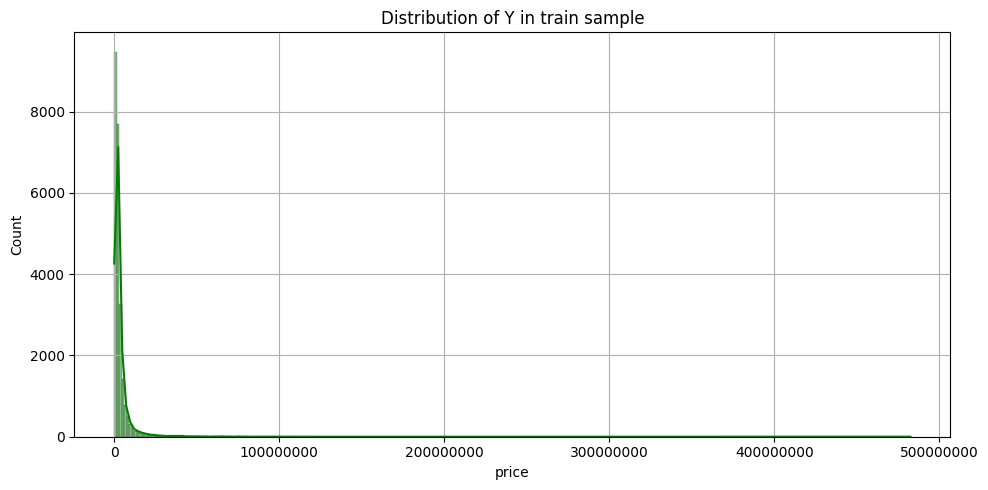

In [48]:
plt.figure(figsize=(10, 5))
sns.histplot(df_train['price'], kde = True, edgecolor='black', color='green')
plt.title('Distribution of Y in train sample')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}')) 
plt.tight_layout()
plt.grid()
plt.show()

In [57]:
# If True → use log1p; if False → log is fine.
(df_train['price'] <= 0).any()

np.True_

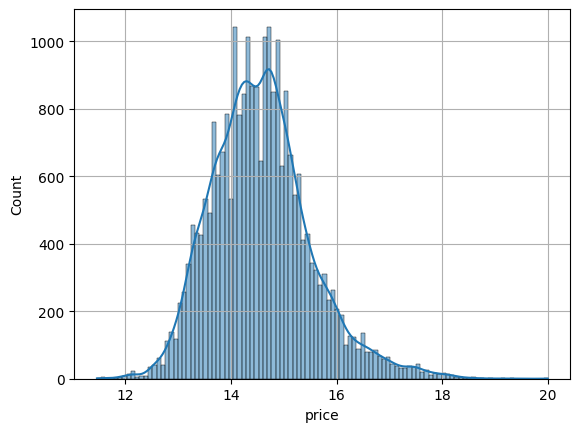

In [67]:
sns.histplot(
    np.log(df_train['price']),
    kde = True
)
plt.grid()

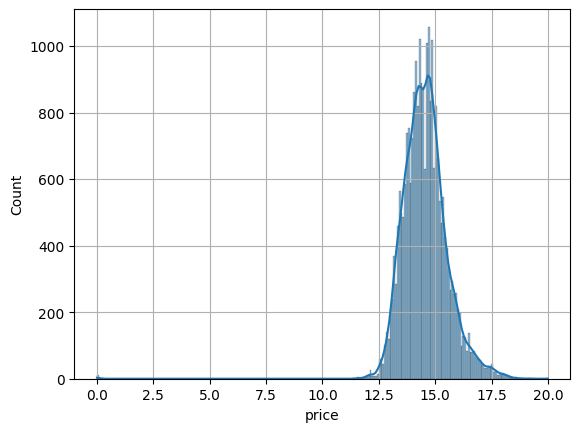

In [68]:
sns.histplot(
    np.log(df_train['price'] + 1),
    kde = True
)
plt.grid()

In [70]:
# y - logged
df_train_y_log = np.log(df_train['price'])

In [79]:
# y - logged + 1
df_train_y_log_p1 = np.log(df_train['price'] + 1)

In [73]:
# if any values ≤ 0, Box-Cox cannot be used directly.

(df_train['price'] <= 0).any()

np.True_

In [75]:
# y - boxcox
df_train_y_boxcox, fitted_lambda = boxcox(df_train['price'] + 1)

print(fitted_lambda)

# adding +1 makes all values positive, so Box-Cox can be applied.

0.04669017097585793


In [91]:
# y - yeojohnson
df_train_y_yeojohnson, fitted_lambda2 = yeojohnson(df_train['price'])

print(fitted_lambda2)

0.04669016380201179


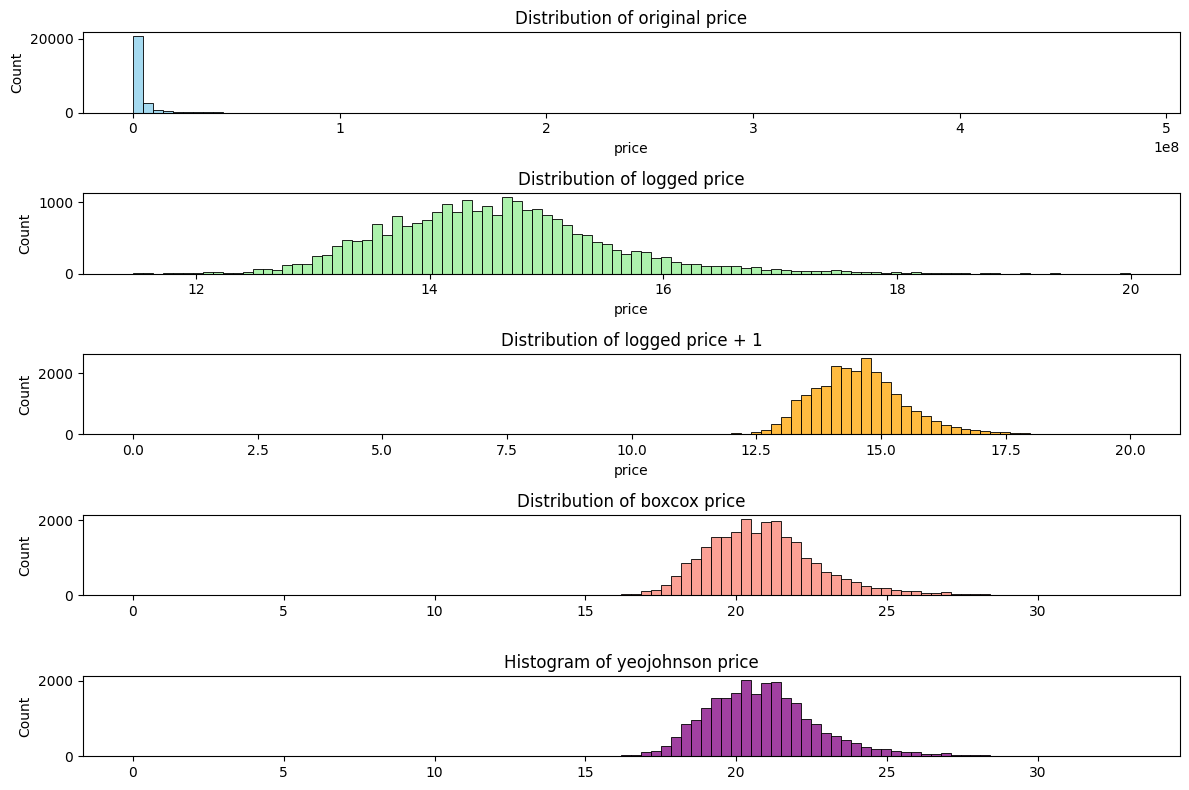

In [116]:
fig, axs = plt.subplots(5, 1, figsize = (12, 8)) # 4 rows, 1 column

sns.histplot(
    df_train['price'],
    bins = 100,
    ax = axs[0],
    color = 'skyblue'
)
axs[0].set_title('Distribution of original price')

sns.histplot(
    df_train_y_log,
    bins = 100,
    ax = axs[1],
    color = 'lightgreen'
)
axs[1].set_title('Distribution of logged price')

sns.histplot(
    df_train_y_log_p1,
    bins = 100,
    ax = axs[2],
    color = 'orange'
)
axs[2].set_title('Distribution of logged price + 1')

sns.histplot(
    df_train_y_boxcox,
    bins = 100,
    ax = axs[3],
    color = 'salmon'
)
axs[3].set_title('Distribution of boxcox price')

sns.histplot(
    df_train_y_yeojohnson,
    bins = 100, 
    ax = axs[4],
    color = 'purple'
)
axs[4].set_title('Histogram of yeojohnson price')

plt.tight_layout()
plt.show()

That choice makes sense: if you have zeros or negatives, Yeo–Johnson is the cleaner solution and avoids ad‑hoc shifts like +1.

Why Box–Cox failed
Box–Cox in standard implementations requires all values to be strictly positive, so any zero or negative price triggers an error.​

Adding +1 just to make Box–Cox run can change the scale and interpretation of the feature, especially if your prices are small.​

Why Yeo–Johnson fits
Yeo–Johnson is explicitly designed to handle zero, negative, and positive values without manual shifting, while still estimating an optimal power to reduce skewness.​

For data that become strictly positive after a shift, Yeo–Johnson behaves similarly to Box–Cox on 
x
+
1
x+1, so you get nearly the same benefit but with fewer constraints.​

In [86]:
df_train['price_y'] = yeojohnson(df_train['price'], lmbda=fitted_lambda2)
df_valid['price_y'] = yeojohnson(df_valid['price'], lmbda=fitted_lambda2)
df_test['price_y'] = yeojohnson(df_test['price'], lmbda=fitted_lambda2)

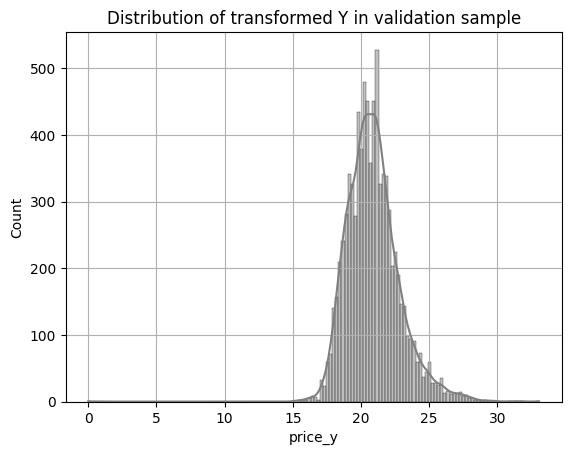

In [114]:
sns.histplot(
    df_valid['price_y'],
    kde = True,
    color = 'grey',
    edgecolor = 'black'
)
plt.title('Distribution of transformed Y in validation sample')
plt.grid()

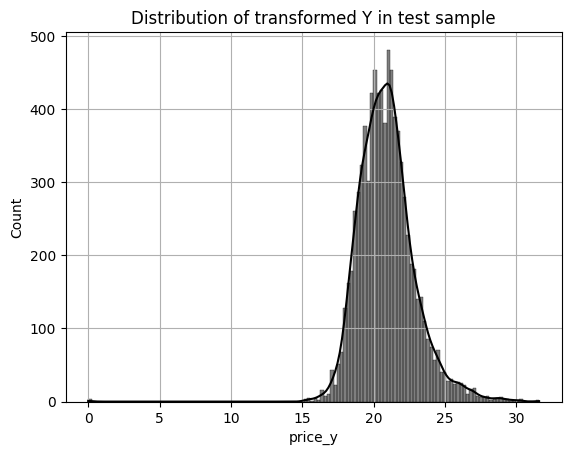

In [113]:
sns.histplot(
    df_test['price_y'],
    kde = True,
    color = 'black',
    edgecolor = 'black'
)
plt.title('Distribution of transformed Y in test sample')
plt.grid()

In [115]:
df_train.columns.tolist()

['price',
 'price_category',
 'type',
 'beds',
 'baths',
 'address',
 'furnishing',
 'completion_status',
 'post_date',
 'average_rent',
 'building_name',
 'year_of_completion',
 'total_parking_spaces',
 'total_floors',
 'total_building_area_sqft',
 'elevators',
 'area_name',
 'city',
 'country',
 'Latitude',
 'Longitude',
 'purpose',
 'price_y']

In [126]:
# sns.boxplot(df_train['price_y'], color=".8", linecolor="#137", linewidth=.75)

In [125]:
# sns.boxplot(
#     df_train['beds'],
#     notch=True, showcaps=False,
#     flierprops={"marker": "x"},
#     boxprops={"facecolor": (.3, .5, .7, .5)},
#     medianprops={"color": "r", "linewidth": 2},
# )

In [127]:
# sns.boxplot(df_train['baths'], fill=False, gap=.1)

In [139]:
import sys
sys.path.append('../src')

from near_zero_variance import near_zero_var

In [143]:
def near_zero_var(df, freq_cut=95/5, unique_cut=10):
    results = []
    for col in df.columns:
        counts = df[col].value_counts()

        # calculate freq_ratio
        if len(counts) > 1:
            freq_ratio = counts.iloc[0] / counts.iloc[1]
        else:
            freq_ratio = float('inf')  # or np.inf

        # calculate unique_ratio
        unique_ratio = len(counts) / len(df) * 100

        # determine binary indicators
        high_freq_ratio = int(freq_ratio > freq_cut)
        low_unique_ratio = int(unique_ratio < unique_cut)

        # append results
        results.append({
            'variable': col,
            'freq_ratio': freq_ratio,
            'unique_ratio': unique_ratio,
            'high_freq_ratio': high_freq_ratio,
            'low_unique_ratio': low_unique_ratio
        })

    results_df = pd.DataFrame(results)
    # sort by high_freq_ratio (descending) and low_unique_ratio (ascending)
    results_df = results_df.sort_values(
        by=['freq_ratio', 'unique_ratio'], ascending=[False, True])

    return results_df

In [144]:
unique_cut = len(df_train) * 0.1

df_train_nzv = near_zero_var(df_train, freq_cut=90/10, unique_cut=unique_cut)

In [145]:
df_train_nzv

,variable,freq_ratio,unique_ratio,high_freq_ratio,low_unique_ratio
18,country,inf,0.004028,1,1
21,purpose,inf,0.004028,1,1
9,average_rent,245.156863,37.751732,1,1
12,total_parking_spaces,185.293478,2.009828,1,1
10,building_name,153.184783,6.307395,1,1
13,total_floors,34.883663,0.330272,1,1
15,elevators,15.103908,0.120831,1,1
11,year_of_completion,14.168385,0.080554,1,1
14,total_building_area_sqft,7.187627,2.360238,0,1
17,city,4.693040,0.032222,0,1


In [146]:
df_train_nzv[(df_train_nzv['low_unique_ratio'] == 1) & (df_train_nzv['high_freq_ratio'] == 1)]

,variable,freq_ratio,unique_ratio,high_freq_ratio,low_unique_ratio
18,country,inf,0.004028,1,1
21,purpose,inf,0.004028,1,1
9,average_rent,245.156863,37.751732,1,1
12,total_parking_spaces,185.293478,2.009828,1,1
10,building_name,153.184783,6.307395,1,1
13,total_floors,34.883663,0.330272,1,1
15,elevators,15.103908,0.120831,1,1
11,year_of_completion,14.168385,0.080554,1,1


near-zero variance (both high_freq_ratio=1 and low_unique_ratio=1), so it’s safe to remove it from your features.

In [147]:
nzv_variables = ['country', 'purpose', 'average_rent', 'total_parking_spaces', 
                 'building_name', 'total_floors', 'elevators', 'year_of_completion']

for var in nzv_variables:
    print(f'Frequency counts for {var}')
    print(df_train[var].value_counts(normalize=True))
    print('-----------------------------------------')

Frequency counts for country
country
UAE    1.0
Name: proportion, dtype: float64
-----------------------------------------
Frequency counts for purpose
purpose
For Sale    1.0
Name: proportion, dtype: float64
-----------------------------------------
Frequency counts for average_rent
average_rent
0         0.503585
90630     0.002054
58324     0.000685
100511    0.000685
88762     0.000685
            ...   
213226    0.000040
237930    0.000040
368755    0.000040
476894    0.000040
161559    0.000040
Name: proportion, Length: 9373, dtype: float64
-----------------------------------------
Frequency counts for total_parking_spaces
total_parking_spaces
0       0.686604
1295    0.003705
1959    0.003222
451     0.002981
1696    0.002860
          ...   
557     0.000040
30      0.000040
524     0.000040
609     0.000040
423     0.000040
Name: proportion, Length: 499, dtype: float64
-----------------------------------------
Frequency counts for building_name
building_name
Unknown          

In [149]:
# remove country and purpose variables as they dont make sense to keep
df_categorical_variables = df_categorical_variables.drop(['country', 'purpose'])

In [160]:
df_categorical_variables.tolist()

['price_category',
 'type',
 'address',
 'furnishing',
 'completion_status',
 'post_date',
 'building_name',
 'area_name',
 'city']

In [155]:
df_dropped_variables = ['Latitude', 'Longitude', 'country', 'purpose']

In [161]:
df_train[df_dropped_variables].head()

,Latitude,Longitude,country,purpose
0,25.153909,55.207500,UAE,For Sale
1,25.196622,55.635824,UAE,For Sale
2,24.427483,54.623488,UAE,For Sale
3,25.031599,55.275689,UAE,For Sale
4,25.077802,55.135181,UAE,For Sale


In [162]:
for var in df_categorical_variables:
    print(df_train[var].value_counts())
    print()

price_category
Medium     8378
Average    8274
High       8176
Name: count, dtype: int64

type
Apartment               17412
Villa                    4435
Townhouse                2023
Residential Plot          570
Penthouse                 193
Hotel Apartment           119
Residential Building       52
Villa Compound             20
Residential Floor           4
Name: count, dtype: int64

address
Al Yasmeen, Ajman                                                                 204
Al Zahya, Ajman                                                                   171
Hayyan, Barashi, Sharjah                                                          160
Al Mamsha, Muwaileh, Sharjah                                                      141
Faradis Tower, Al Mamzar, Sharjah                                                 139
                                                                                 ... 
399 Hills Park B, 399 Hills Park, Dubai Hills Estate, Dubai                         

---
Keep & Encode (valuable)

price_category → ordinal encode (you already did)

type → one-hot encode

furnishing → one-hot or binary

completion_status → one-hot

city → one-hot
(these clearly affect price)

---


post_date = pd.to_datetime(df['post_date'])\
df['year'] = post_date.dt.year\
df['month'] = post_date.dt.month\
df['quarter'] = post_date.dt.quarter

---

building_name

Very high cardinality. Don’t one-hot directly. Options:

Keep only top N frequent buildings, label “Other”

OR drop it if you don’t need micro-granularity

OR only use in tree models with target encoding

Label encoding is not good for linear models.

---

area_name

Very important real-estate feature → keep
But high cardinality:

One-hot top ~20–50 areas, rest “Other”

Or target encode

Or use tree models that handle it well

---

address → too specific, noisy, massive cardinality
(drop it)

### Date to DateTime Format

In [164]:
df_train_copy = df_train.copy()
df_valid_copy = df_valid.copy()
df_test_copy = df_test.copy()

In [165]:
# train sample
post_date = pd.to_datetime(df_train['post_date'])
df_train['year'] = post_date.dt.year
df_train['month'] = post_date.dt.month
df_train['quarter'] = post_date.dt.quarter

# valid sample
post_date = pd.to_datetime(df_valid['post_date'])
df_valid['year'] = post_date.dt.year
df_valid['month'] = post_date.dt.month
df_valid['quarter'] = post_date.dt.quarter

# test sample
post_date = pd.to_datetime(df_test['post_date'])
df_test['year'] = post_date.dt.year
df_test['month'] = post_date.dt.month
df_test['quarter'] = post_date.dt.quarter

In [169]:
df_train['quarter'].value_counts()

quarter
1    11774
2     9757
4     2647
3      650
Name: count, dtype: int64

In [170]:
df_train['month'].value_counts()

month
4     9643
3     5909
2     3739
1     2126
12    1050
11    1018
10     579
9      335
8      224
7       91
6       69
5       45
Name: count, dtype: int64

In [171]:
df_train['year'].value_counts()

year
2024    21353
2023     3437
2022       38
Name: count, dtype: int64

### Drop address column

In [172]:
# train sample
df_train = df_train.drop(['address'], axis = 1)

# valid sample
df_valid = df_valid.drop(['address'], axis = 1)

# test sample
df_test = df_test.drop(['address'], axis = 1)

In [173]:
df_categorical_variables = df_categorical_variables.drop(['address'])

In [177]:
df_categorical_variables = df_categorical_variables.drop(['post_date'])

In [178]:
df_train.columns

Index(['price', 'price_category', 'type', 'beds', 'baths', 'furnishing',
       'completion_status', 'post_date', 'average_rent', 'building_name',
       'year_of_completion', 'total_parking_spaces', 'total_floors',
       'total_building_area_sqft', 'elevators', 'area_name', 'city', 'country',
       'Latitude', 'Longitude', 'purpose', 'price_y', 'year', 'month',
       'quarter'],
      dtype='object')

In [179]:
# train sample
df_train = df_train.drop(['post_date', 'country', 'Latitude', 
                          'Longitude', 'purpose'], axis = 1)

# valid sample
df_valid = df_valid.drop(['post_date', 'country', 'Latitude', 
                          'Longitude', 'purpose'], axis = 1)

# test sample
df_test = df_test.drop(['post_date', 'country', 'Latitude', 
                          'Longitude', 'purpose'], axis = 1)

In [180]:
df_train.columns

Index(['price', 'price_category', 'type', 'beds', 'baths', 'furnishing',
       'completion_status', 'average_rent', 'building_name',
       'year_of_completion', 'total_parking_spaces', 'total_floors',
       'total_building_area_sqft', 'elevators', 'area_name', 'city', 'price_y',
       'year', 'month', 'quarter'],
      dtype='object')

### Nominal Encoding

In [181]:
nominal_variables = ['type', 'furnishing', 'completion_status', 'city']

In [182]:
# train sample
df_train = pd.get_dummies(
    df_train,
    columns = nominal_variables,
    drop_first = True,
    dtype = int
)

# valid sample
df_valid = pd.get_dummies(
    df_valid,
    columns = nominal_variables,
    drop_first = True,
    dtype = int
)

# test sample
df_test = pd.get_dummies(
    df_test,
    columns = nominal_variables,
    drop_first = True,
    dtype = int
)

In [185]:
df_train.columns

Index(['price', 'price_category', 'beds', 'baths', 'average_rent',
       'building_name', 'year_of_completion', 'total_parking_spaces',
       'total_floors', 'total_building_area_sqft', 'elevators', 'area_name',
       'price_y', 'year', 'month', 'quarter', 'type_Hotel Apartment',
       'type_Penthouse', 'type_Residential Building', 'type_Residential Floor',
       'type_Residential Plot', 'type_Townhouse', 'type_Villa',
       'type_Villa Compound', 'furnishing_Unfurnished',
       'completion_status_Ready', 'city_Ajman', 'city_Al Ain', 'city_Dubai',
       'city_Fujairah', 'city_Ras Al Khaimah', 'city_Sharjah',
       'city_Umm Al Quwain'],
      dtype='object')

df_train_encoded[selected_features] = df_train_encoded[selected_features].apply(pd.to_numeric)

In [191]:
df_train.select_dtypes(np.object_).head()

,price_category,building_name,area_name
0,High,Unknown,Umm Suqeim
1,High,Unknown,Sharjah Garden City
2,Medium,Unknown,Masdar City
3,High,Unknown,Reem
4,Medium,Sadaf 7,Jumeirah Beach Residence (JBR)


### After Nominal Encoding
I had to make sure that all variables are INT format, sometimes they stay as objects

### Ordinal Encoding

In [197]:
order = ['Average', 'Medium', 'High']
mapping = {v:i for i,v in enumerate(order)}

# train sample
df_train['price_category'] = df_train['price_category'].map(mapping)

# valid sample
df_valid['price_category'] = df_valid['price_category'].map(mapping)

# test sample
df_test['price_category'] = df_test['price_category'].map(mapping)

In [199]:
df_train.select_dtypes(np.object_).head()

,building_name,area_name
0,Unknown,Umm Suqeim
1,Unknown,Sharjah Garden City
2,Unknown,Masdar City
3,Unknown,Reem
4,Sadaf 7,Jumeirah Beach Residence (JBR)


In [210]:
df_train['building_name'].value_counts(normalize=True).head(10)

building_name
Unknown                                  0.567625
AYKON CITY-TOWER B                       0.003705
AYKON CITY (2) -TOWER C                  0.002618
Forte T1                                 0.002497
SEVEN HOTEL & APARTMENTS THE PALM - B    0.002135
CHIC TOWER                               0.002014
Peninsula Four                           0.001893
Binghatti Corner                         0.001893
Cavalli Casa Tower                       0.001732
Ciel                                     0.001732
Name: proportion, dtype: float64

In [216]:
df_train['area_name'].value_counts(normalize=False).head(15)

area_name
Business Bay                     1487
Jumeirah Village Circle (JVC)    1478
Dubai Marina                     1284
Downtown Dubai                   1242
Al Reem Island                   1034
Yas Island                        889
Palm Jumeirah                     806
Dubai Creek Harbour               569
Jumeirah Lake Towers (JLT)        545
Dubai Hills Estate                537
Saadiyat Island                   479
Sobha Hartland                    446
Arjan                             432
Dubai Harbour                     395
Aljada                            380
Name: count, dtype: int64

In [212]:
# for tree based models keep it, will handle label encoding later on

df_train_tree = df_train.copy()

df_valid_tree = df_valid.copy()

df_test_tree = df_test.copy()

In [213]:
#save df to CSV file
df_train_tree.to_csv('../Data/df_train_tree.csv', index=False)
df_valid_tree.to_csv('../Data/df_valid_tree.csv', index=False)
df_test_tree.to_csv('../Data/df_test_tree.csv', index=False)

In [220]:
# area_name variable

top_k = 15
top_areas = df_train['area_name'].value_counts().head(top_k).index

# keep top 50, rest as 'Other'
df_train['area_name'] = df_train['area_name'].where(
    df_train['area_name'].isin(top_areas), 'Other'
)

df_train = pd.get_dummies(
    df_train,
    columns = ['area_name'],
    drop_first = True,
    dtype = int
)

In [223]:
df_train.head()

,price,price_category,beds,baths,average_rent,building_name,year_of_completion,total_parking_spaces,total_floors,total_building_area_sqft,...,area_name_Dubai Harbour,area_name_Dubai Hills Estate,area_name_Dubai Marina,area_name_Jumeirah Lake Towers (JLT),area_name_Jumeirah Village Circle (JVC),area_name_Other,area_name_Palm Jumeirah,area_name_Saadiyat Island,area_name_Sobha Hartland,area_name_Yas Island
0,23000000,2,4,5,284778,Unknown,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4794000,2,5,6,0,Unknown,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1650000,1,3,4,129166,Unknown,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3300000,2,4,5,223020,Unknown,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2350000,1,2,3,158650,Sadaf 7,2007,0,53,454,...,0,0,0,0,0,1,0,0,0,0


In [224]:
# valid sample

top_k = 15
top_areas = df_valid['area_name'].value_counts().head(top_k).index

df_valid['area_name'] = df_valid['area_name'].where(
    df_valid['area_name'].isin(top_areas), 'Other'
)

df_valid = pd.get_dummies(
    df_valid,
    columns = ['area_name'],
    drop_first = True,
    dtype = int
)

# test sample

top_k = 15
top_areas = df_test['area_name'].value_counts().head(top_k).index

df_test['area_name'] = df_test['area_name'].where(
    df_test['area_name'].isin(top_areas), 'Other'
)

df_test = pd.get_dummies(
    df_test,
    columns = ['area_name'],
    drop_first = True,
    dtype = int
)

In [225]:
df_test.head()

,price,price_category,beds,baths,average_rent,building_name,year_of_completion,total_parking_spaces,total_floors,total_building_area_sqft,...,area_name_Dubai Harbour,area_name_Dubai Hills Estate,area_name_Dubai Marina,area_name_Jumeirah Lake Towers (JLT),area_name_Jumeirah Village Circle (JVC),area_name_Other,area_name_Palm Jumeirah,area_name_Saadiyat Island,area_name_Sobha Hartland,area_name_Yas Island
0,3200000,2,2,3,0,Unknown,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2261000,1,3,4,0,Unknown,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500000,1,4,5,57716,Unknown,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4100000,2,3,4,306529,Unknown,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2360000,1,3,4,0,Unknown,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [227]:
# remove "building_name" as it cointains many "Unknown" values

# train sample
df_train = df_train.drop(['building_name'], axis = 1)

# valid sample
df_valid = df_valid.drop(['building_name'], axis = 1)

# test sample
df_test = df_test.drop(['building_name'], axis = 1)

In [228]:
df_train.select_dtypes(np.object_).head()

""
0
1
2
3
4


### Clean Dataset
Now we have cleaned and preprocessed our dataset. We have all numerical variables. Encoded all categorical variables. Saved last dataset for tree based models.

In [230]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(24828, 46)
(8276, 45)
(8277, 47)


In [234]:
df_test.columns

Index(['price', 'price_category', 'beds', 'baths', 'average_rent',
       'year_of_completion', 'total_parking_spaces', 'total_floors',
       'total_building_area_sqft', 'elevators', 'price_y', 'year', 'month',
       'quarter', 'type_Hotel Apartment', 'type_Penthouse',
       'type_Residential Building', 'type_Residential Floor',
       'type_Residential Plot', 'type_Townhouse', 'type_Villa',
       'type_Villa Compound', 'furnishing_Unfurnished',
       'completion_status_Ready', 'city_Ajman', 'city_Al Ain',
       'city_Al Napoca', 'city_Dubai', 'city_Fujairah', 'city_Ras Al Khaimah',
       'city_Sharjah', 'city_Umm Al Quwain', 'area_name_Aljada',
       'area_name_Arjan', 'area_name_Business Bay', 'area_name_Downtown Dubai',
       'area_name_Dubai Creek Harbour', 'area_name_Dubai Harbour',
       'area_name_Dubai Hills Estate', 'area_name_Dubai Marina',
       'area_name_Jumeirah Lake Towers (JLT)',
       'area_name_Jumeirah Village Circle (JVC)', 'area_name_Other',
       'are

In [235]:
df_valid.columns

Index(['price', 'price_category', 'beds', 'baths', 'average_rent',
       'year_of_completion', 'total_parking_spaces', 'total_floors',
       'total_building_area_sqft', 'elevators', 'price_y', 'year', 'month',
       'quarter', 'type_Hotel Apartment', 'type_Penthouse',
       'type_Residential Building', 'type_Residential Floor',
       'type_Residential Plot', 'type_Townhouse', 'type_Villa',
       'type_Villa Compound', 'furnishing_Unfurnished',
       'completion_status_Ready', 'city_Ajman', 'city_Al Ain', 'city_Dubai',
       'city_Ras Al Khaimah', 'city_Sharjah', 'city_Umm Al Quwain',
       'area_name_Aljada', 'area_name_Arjan', 'area_name_Business Bay',
       'area_name_Downtown Dubai', 'area_name_Dubai Creek Harbour',
       'area_name_Dubai Harbour', 'area_name_Dubai Hills Estate',
       'area_name_Dubai Marina', 'area_name_Jumeirah Lake Towers (JLT)',
       'area_name_Jumeirah Village Circle (JVC)', 'area_name_Other',
       'area_name_Palm Jumeirah', 'area_name_Saadiyat

In [236]:
df_train.columns

Index(['price', 'price_category', 'beds', 'baths', 'average_rent',
       'year_of_completion', 'total_parking_spaces', 'total_floors',
       'total_building_area_sqft', 'elevators', 'price_y', 'year', 'month',
       'quarter', 'type_Hotel Apartment', 'type_Penthouse',
       'type_Residential Building', 'type_Residential Floor',
       'type_Residential Plot', 'type_Townhouse', 'type_Villa',
       'type_Villa Compound', 'furnishing_Unfurnished',
       'completion_status_Ready', 'city_Ajman', 'city_Al Ain', 'city_Dubai',
       'city_Fujairah', 'city_Ras Al Khaimah', 'city_Sharjah',
       'city_Umm Al Quwain', 'area_name_Aljada', 'area_name_Arjan',
       'area_name_Business Bay', 'area_name_Downtown Dubai',
       'area_name_Dubai Creek Harbour', 'area_name_Dubai Harbour',
       'area_name_Dubai Hills Estate', 'area_name_Dubai Marina',
       'area_name_Jumeirah Lake Towers (JLT)',
       'area_name_Jumeirah Village Circle (JVC)', 'area_name_Other',
       'area_name_Palm Jumeir

In [238]:
# Add missing columns (set to 0) and drop extra columns
for col in df_train.columns:
    if col not in df_valid.columns:
        df_valid[col] = 0
    if col not in df_test.columns:
        df_test[col] = 0

# Drop columns in valid/test that are not in train
df_valid = df_valid[df_train.columns]
df_test = df_test[df_train.columns]

In [239]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(24828, 46)
(8276, 46)
(8277, 46)


In [240]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24828 entries, 0 to 24827
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   price                                    24828 non-null  int64  
 1   price_category                           24828 non-null  int64  
 2   beds                                     24828 non-null  int64  
 3   baths                                    24828 non-null  int64  
 4   average_rent                             24828 non-null  int64  
 5   year_of_completion                       24828 non-null  int64  
 6   total_parking_spaces                     24828 non-null  int64  
 7   total_floors                             24828 non-null  int64  
 8   total_building_area_sqft                 24828 non-null  int64  
 9   elevators                                24828 non-null  int64  
 10  price_y                                  24828

In [241]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276 entries, 0 to 8275
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   price                                    8276 non-null   int64  
 1   price_category                           8276 non-null   int64  
 2   beds                                     8276 non-null   int64  
 3   baths                                    8276 non-null   int64  
 4   average_rent                             8276 non-null   int64  
 5   year_of_completion                       8276 non-null   int64  
 6   total_parking_spaces                     8276 non-null   int64  
 7   total_floors                             8276 non-null   int64  
 8   total_building_area_sqft                 8276 non-null   int64  
 9   elevators                                8276 non-null   int64  
 10  price_y                                  8276 no

In [242]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8277 entries, 0 to 8276
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   price                                    8277 non-null   int64  
 1   price_category                           8277 non-null   int64  
 2   beds                                     8277 non-null   int64  
 3   baths                                    8277 non-null   int64  
 4   average_rent                             8277 non-null   int64  
 5   year_of_completion                       8277 non-null   int64  
 6   total_parking_spaces                     8277 non-null   int64  
 7   total_floors                             8277 non-null   int64  
 8   total_building_area_sqft                 8277 non-null   int64  
 9   elevators                                8277 non-null   int64  
 10  price_y                                  8277 no

### Now the dataset is ready for modeling...

In [243]:
#save df to CSV file
df_train.to_csv('../Data/processed/df_train.csv', index=False)
df_valid.to_csv('../Data/processed/df_valid.csv', index=False)
df_test.to_csv('../Data/processed/df_test.csv', index=False)